In [1]:
import hickle as hkl
import numpy as np
import os

In [2]:
def process_file(file):
    data = hkl.load(file)
    return data

In [3]:
all_data = {}
for file in os.listdir('.'):
    if "hkl" in file:
        data = process_file(file)
        print(data['task_training'], '\n\n') # there will be 0: [of len epochs #] task 0s epoch accuracy
        all_data[file] = data
print([(key,all_data[key]['f1_macro'],all_data[key]['f1_micro']) for key in all_data.keys()])


{0: [tensor(89.1675), tensor(89.6046), tensor(89.7497), tensor(89.9110), tensor(90.0272), tensor(90.0413), tensor(90.0471), tensor(90.1388), tensor(90.0930), tensor(90.2166), tensor(90.2351), tensor(90.2637), tensor(90.1808), tensor(90.2351), tensor(90.2782), tensor(90.2467), tensor(90.2607), tensor(90.3726), tensor(90.3679), tensor(90.3187), tensor(90.3578), tensor(90.2648), tensor(90.3407), tensor(90.2913), tensor(90.2642)], 1: [tensor(0.1481), tensor(0.1443), tensor(0.2059), tensor(0.2443), tensor(0.2270), tensor(0.0351), tensor(0.0293), tensor(0.0390), tensor(0.0449), tensor(0.0644), tensor(0.0456), tensor(0.0317), tensor(0.0376), tensor(0.0416), tensor(0.0297), tensor(0.0161), tensor(0.0382), tensor(0.0261), tensor(0.0241), tensor(0.0342), tensor(0.0204), tensor(0.0429), tensor(0.0327), tensor(0.0347), tensor(0.0306)], 2: [tensor(0.1095), tensor(0.1180), tensor(0.1359), tensor(0.1359), tensor(0.1809), tensor(0.0484), tensor(0.0508), tensor(0.0758), tensor(0.0805), tensor(0.0890), 

In [4]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

In [9]:

def print_confusion(data_mapping):
    fig, axs = plt.subplots(3, 1, figsize=(16, 16))  # Create a 1x2 subplot layout for each run
    for i, run in enumerate(data_mapping.keys()):
        print(run, 'running')
        cm = data_mapping[run]['confusion']  # Get the confusion matrix for the specific run
        cm_np = cm.cpu().numpy() if isinstance(cm, torch.Tensor) else np.array(cm)

        

        # Plot the confusion matrix for each subplot
        
        display = ConfusionMatrixDisplay(cm_np)  # Use the numpy array of the confusion matrix
        display.plot(include_values=True, cmap='viridis', ax=axs[i], xticks_rotation='vertical')  # Include values and use the 'viridis' colormap
        axs[i].set_title(f'Confusion Matrix for {run}')  # Set title for each subplot
            # axs[i].set_xticklabels(display.display_labels, rotation=45)  # Rotate x-axis labels for better visibility
            # axs[i].set_yticklabels(display.display_labels)  # Set y-axis labels

            # Annotate each cell with the numerical value
            # f

        
    plt.tight_layout()
    plt.show()


dict_keys(['multi_modal_clustering_features_SHL.hkl', 'cnn_features_SHL.hkl', 'baseline_hart_SHL.hkl'])
multi_modal_clustering_features_SHL.hkl running
cnn_features_SHL.hkl running
baseline_hart_SHL.hkl running


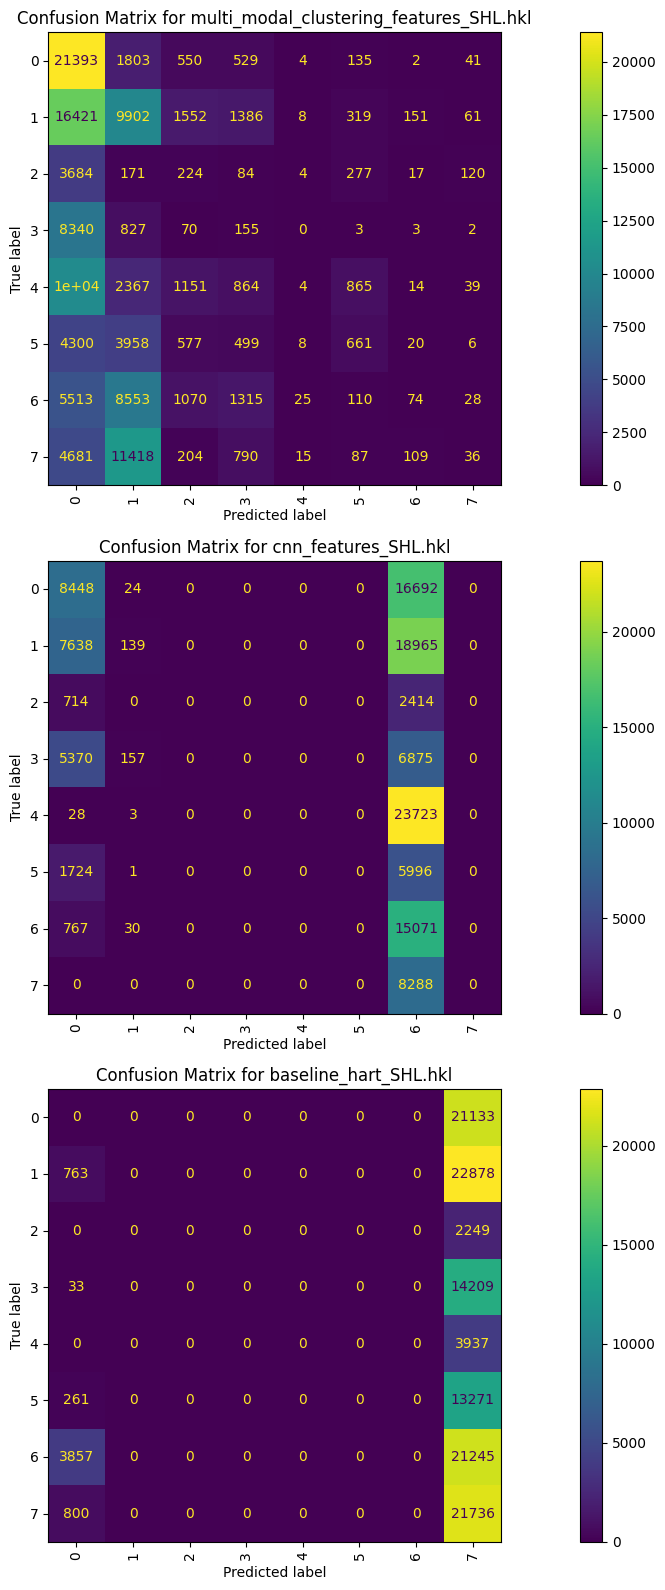

In [10]:
# to run the confusion matrix viewing
print(all_data.keys())
print_confusion(all_data)